<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict 
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'cookie_cats.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'mock_sales_data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'match_result_test.csv',
 'online_retail.xlsx',
 'scanner_data.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 '1_orders_dataset.csv',
 'ab_experiment.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_data_with_stores.csv',
 'sales.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'test.csv',
 'mall_customers.csv',
 'bz_data_analyis.csv',
 '1_order_payments_dataset.csv',
 'lead_conversion.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [6]:
df = pd.read_csv('groceries.csv')
df.sales_date = df.sales_date.to_numpy().astype('datetime64[D]')
df['week'] = df['sales_date'] - df['sales_date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.price * df.sales_quantity
df.head()

,product_code,product_description,product_group,sales_date,price,sales_quantity,unit,week,rev
0,1001,tomato,vegetable,2021-11-01,2.99,36,kg,2021-11-01,107.64
1,1001,tomato,vegetable,2021-11-02,2.99,23,kg,2021-11-01,68.77
2,1001,tomato,vegetable,2021-11-03,2.99,34,kg,2021-11-01,101.66
3,1001,tomato,vegetable,2021-11-04,2.99,23,kg,2021-11-01,68.77
4,1001,tomato,vegetable,2021-11-05,2.99,34,kg,2021-11-01,101.66


In [7]:
cnt_rev = df.groupby(['product_group', 'week'])['rev'].sum().reset_index(name = 'rev')
cnt_rev.head()

,product_group,week,rev
0,dairy,2021-11-01,5240.0
1,dairy,2021-11-08,4095.7
2,dairy,2021-11-15,3999.3
3,dairy,2021-11-22,4944.7
4,dairy,2021-11-29,1699.0


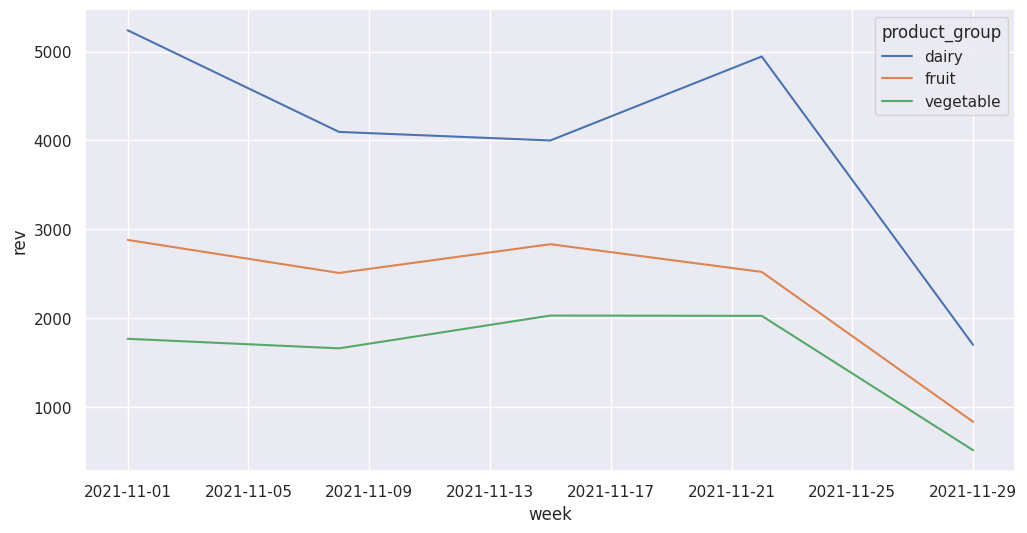

In [8]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.lineplot(data = cnt_rev, x = 'week', y = 'rev', hue = 'product_group')
plt.show()

# Iterators

In [9]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [10]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [11]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}